<a href="https://colab.research.google.com/github/sjtao98/NUCL610/blob/main/Project2/Project2_NUCL610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 2 - NUCL 610
# Diffusion Nodal Expansion Method (NEM)

Import packages required for the codes

In [ ]:
import math as m
import cmath as cm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:
# Global variables to be accessed anywhere
global ng, nregions, geom_length, nmesh_per_region, materials, \
        XS_num, nmesh, geom, xs, BC, Amatrix, Bdiag, a024, a24, a1l, Cll, Clr, \
        Crr, Crl, rClr, Br, Bl, A, Al, Ar, b, qBl, qbr, sf, ss, q0, q1, q2, \
        s0, s1, s2, curns, phi, adfs, Chi, l, r, ab, tr, nf, scat, even_moments, \
        nx, ny, Dtilda, D_hat, D2tilda, A1, A2, A12, A21, b1, b2, Dc, Keff, iter, iter_max, \
        lamb, lamb_prev, eshift, eshift0, eshift_r, wiel, lamb_s, \
        psi, psid, sf_prev, Am, src

################################################################
#                         Data Input                           #
# ------------------------------------------------------------ #
# ng = number of energy groups                                 #
# nregions = Number of total regions in geometry               #
# materials = List of materials with a length of nmesh         #
# nmesh_per_reg = Number of refined meshes per material region #
# nmesh = Number of total meshes in geometry                   #
# BC = Boundary conditions (0=refl, 1=zero flux, 2=refl)       #
################################################################

ng = 2
nregions = 5
geom_length = 100
nmesh_per_region = 16
materials  = ['UO2']*nregions#['UO2','MOX','UO2','MOX','UO2']
lam_init = 1.2
wiel = True
show_iter = True
log_plot = True
BC = [0,2]
data = [[8.873837e-3,	5.424022e-3,	2.332139e-1,	1.592122e-2],
        [6.377025e-2,	9.959442e-2,	8.918111e-1,	0],
        [1.406811e-2, 1.126274e-2,	2.219159e-1,	1.147102e-2],
        [2.691350e-1, 4.577393e-1,	1.043375e+0,	0]]



# Assign enum to XS names
ab   = 0
nf   = 1
tr   = 2
scat = 3
XS_num = 4

# Process input
nmesh = nregions * nmesh_per_region
lmesh = geom_length / nmesh
geom = [lmesh]*nmesh
xs = np.zeros([nmesh, XS_num, ng])
mat_xs = {'UO2':{0:{}, 1:{}, 2:{}, 3:{}}, 'MOX':{0:{}, 1:{}, 2:{}, 3:{}}}

# Initialize matrices
Amatrix = np.zeros([ng,ng,2])
Bdiag   = np.zeros([ng,2])
a024    = np.zeros([ng,2])
a24     = np.zeros([ng,2])
a1l     = np.zeros([ng])
Cll     = np.zeros([ng])
Clr     = np.zeros([ng])
Crr     = np.zeros([ng])
Crl     = np.zeros([ng])
rClr    = np.zeros([ng])
Br      = np.zeros([ng])
Bl      = np.zeros([ng])
A       = np.zeros([ng,ng])
Al      = np.zeros([ng,2])
Ar      = np.zeros([ng,2])
b       = np.zeros([ng])
qbr     = np.zeros([ng])
qBl     = np.zeros([ng])
curns   = np.zeros([nmesh,ng])

phi     = np.ones([nmesh,ng])
sf      = np.ones([nmesh])
ss      = np.ones([nmesh])
psi     = np.zeros([nmesh])
psid    = np.zeros([nmesh])
sf_prev = np.ones([nmesh])

Dc      = np.ones([nmesh+1,ng])
D_hat   = np.zeros([nmesh+1,ng])
Dtilda  = np.zeros([nmesh+1,ng])
D2tilda = np.zeros([nmesh+1,ng,2]) # left and right

# not needed, but used for generality
q0      = np.zeros([ng,2])
q1      = np.zeros([ng,2])
q2      = np.zeros([ng,2])
s0      = np.zeros([ng, 3])
s1      = np.zeros([ng, 3])
s2      = np.zeros([ng, 3])
adfs    = np.ones([nmesh,ng])

# only 1 in first group of fuel
Chi      = np.ones([nmesh,ng])
Chi[:,1] = .0

# Constants
l = 0
r = 1
even_moments = True

# Dimensions
nx = nmesh
ny = 1

# Iterations
iter = 0
iter_max = 200

# Wielandt
# fraction of fission source remaining on RHS after eigenvalue shift
eshift_r = 0.1
# eigenvalue error estimation factor
eshift0  = 10
eshift   = eshift_r

# redefine materials
new_materials = []
for mat in materials:
  for idx in range(nmesh_per_region):
    new_materials.append(mat)

# process xs
for idx,mat in enumerate(mat_xs.keys()):
  offset = idx*ng
  for xs_type in range(XS_num):
    for g in range(ng):
      mat_xs[mat][xs_type][g] = float(data[g+offset][xs_type])
      
# process GEOM
for idx,mat in enumerate(new_materials):
  offset = idx*ng
  for xs_type in range(XS_num):
    for g in range(ng):
      xs[idx][xs_type][g] = mat_xs[mat][xs_type][g]

# Sources
lamb = lam_init
lamb_prev = 0.1
Keff = 1/lamb
for idx in range(nmesh):
  for g in range(ng):
    sf[idx] = sf[idx] + phi[idx][g]*xs[idx][nf][g]   # fission source
    ss[idx] = ss[idx] + phi[idx][g]*xs[idx][scat][g] # scattering source
  psi[idx] = sum(xs[idx][nf]) * geom[idx]

# CMFD matrix
A1  = np.zeros([nmesh,nmesh])
A2  = np.zeros([nmesh,nmesh])
A12 = np.zeros([nmesh,nmesh])
A21 = np.zeros([nmesh,nmesh])
b1  = np.zeros([nmesh])
b2  = np.zeros([nmesh])
Am  = np.vstack([np.hstack([A1, A21]), np.hstack([A12, A2])])
src = np.hstack([b1,b2])

## Input Processing

---



## Analytical Diffusion Solver (Anna, True, Tao)

---



In [ ]:
def _analytical(case, lam_init):

    def _init_global():
        if case == 'UO2':
            para_dict = {
                "sig_a1": 8.873837e-3,
                "nusig_f1": 5.424022e-3,
                "sig_tr1": 2.332139e-1,
                "sig_12": 1.592122e-2,
                "sig_a2": 6.377025e-2,
                "nusig_f2": 9.959442e-2,
                "sig_tr2": 8.918111e-1,
                "sig_21": 0,
                "h": 100
            }
        elif case == 'MOX':
            para_dict = {
                "sig_a1": 1.406811e-2,
                "nusig_f1": 1.126274e-2,
                "sig_tr1": 2.219159e-1,
                "sig_12": 1.147102e-2,
                "sig_a2": 2.691350e-1,
                "nusig_f2": 4.577393e-1,
                "sig_tr2": 1.043375e+0,
                "sig_21": 0,
                "h": 100
            }
        return para_dict;

        
    #Ref: slides #4 page 3
    def _cn(Bsquare, h):
        if Bsquare > 0:
            return m.cos(m.sqrt(Bsquare) * h)
        elif Bsquare == 0:
            return 1;
        else:
            return m.cosh(abs(cm.sqrt(Bsquare)) * h)
    
    def _sn(Bsquare, h):
        if Bsquare > 0:
            return m.sin(m.sqrt(Bsquare) * h) / m.sqrt(Bsquare)
        elif Bsquare == 0:
            return h;
        else:
            return m.sinh(abs(cm.sqrt(Bsquare)) * h) / abs(cm.sqrt(Bsquare))
    
    #Ref: slides #4 page 7 
    def _B1square(p, q):
        return (-p + m.sqrt(p**2 + 4 * q)) / 2
    
    def _B2square(p, q):
        return (-p - m.sqrt(p**2 + 4 * q)) / 2
    
    def _f(lam):
        #initalize input variables
        parameter = _init_global()
        sig_a1 = parameter["sig_a1"]
        nusig_f1 = parameter["nusig_f1"]
        sig_tr1 = parameter["sig_tr1"]
        sig_12 = parameter["sig_12"]
        sig_a2 = parameter["sig_a2"]
        nusig_f2 = parameter["nusig_f2"]
        sig_tr2 = parameter["sig_tr2"]
        sig_21 = parameter["sig_21"]
        h  = parameter["h"]
        
        #find D1, D2, sig_r1, sig_r2
        D1 = 1.0 / 3 / sig_tr1;
        D2 = 1.0 / 3 / sig_tr2;
        sig_r1 = sig_a1 + sig_12;
        sig_r2 = sig_a2 + sig_21;
        
        #computation
        p = sig_r2 / D2 + (sig_r1 - lam * nusig_f1) / D1
        q = (lam * nusig_f2 + sig_21) * sig_12 - sig_r2 * (sig_r1 - lam * nusig_f1)
        q = q / D1 / D2
        
        B1s = _B1square(p, q)
        B2s = _B2square(p, q)
        
        sn1 = _sn(B1s, h)
        cn1 = _cn(B1s, h)
        sn2 = _sn(B2s, h)
        cn2 = _cn(B2s, h)
        
        left = (D2 * B1s + sig_r2) * (2 * sn1 * D1 * B1s - cn1) * (-2 * sn2 * D2 * B2s + cn2)
        right = (D2 * B2s + sig_r2) * (-2 * sn2 * D1 * B2s + cn2) * (2 * sn1 * D2 * B1s - cn1)
        
        return left - right
 
    #plotting phi_1(x) and phi_2(x)
    def _phi(lam, lam_init):
        #initalize input variables
        parameter = _init_global()
        sig_a1 = parameter["sig_a1"]
        nusig_f1 = parameter["nusig_f1"]
        sig_tr1 = parameter["sig_tr1"]
        sig_12 = parameter["sig_12"]
        sig_a2 = parameter["sig_a2"]
        nusig_f2 = parameter["nusig_f2"]
        sig_tr2 = parameter["sig_tr2"]
        sig_21 = parameter["sig_21"]
        h  = parameter["h"]
        
        #find D1, D2, sig_r1, sig_r2
        D1 = 1.0 / 3 / sig_tr1;
        D2 = 1.0 / 3 / sig_tr2;
        sig_r1 = sig_a1 + sig_12;
        sig_r2 = sig_a2 + sig_21;
        
        #computation
        p = sig_r2 / D2 + (sig_r1 - lam * nusig_f1) / D1
        q = (lam * nusig_f2 + sig_21) * sig_12 - sig_r2 * (sig_r1 - lam * nusig_f1)
        q = q / D1 / D2
        
        B1s = _B1square(p, q)
        B2s = _B2square(p, q)
        
        sn1 = _sn(B1s, h)
        cn1 = _cn(B1s, h)
        sn2 = _sn(B2s, h)
        cn2 = _cn(B2s, h)
        
        C10 = -2 * sn2 * D2 * B2s + cn2
        C20 = 2 * sn1 * D2 * B1s - cn1
        
        C20 = C20/C10;
        C10 = 1;
        # print("C10 = " + str(C10) + ";  C20 = " + str(C20))
        
        num = h*50+1 #6
        X = np.linspace(0, h, num)
        phi = np.zeros([num,2])
        # phi1 = np.zeros(num)
        # phi2 = np.zeros(num)
        
        file1 = open("%s.txt" %(case+"_phi_result"),"w")
        scale = (D2 * B1s + sig_r2) * C10 * _cn(B1s, X[0]) + \
                (D2 * B2s + sig_r2) * C20 * _cn(B2s, X[0])
        for i in range(len(X)):
            a1 = (D2 * B1s + sig_r2) * C10 * _cn(B1s, X[i])
            a2 = (D2 * B2s + sig_r2) * C20 * _cn(B2s, X[i])
            phi[i,0] = a1 + a2
            
            b1 = sig_12 * C10 * _cn(B1s, X[i])
            b2 = sig_12 * C20 * _cn(B2s, X[i])
            phi[i,1] = b1 + b2
            
            phi[i,0] = phi[i,0] / scale
            phi[i,1] = phi[i,1] / scale
            file1.write(str(X[i]) + "  " + str(phi[i,0])  + "  " + str(phi[i,1]))
            file1.write("\n")
        
        file1.close()
        #plt.plot(X, phi[:,0], label = "$\phi_1(x)$")
        #plt.plot(X, phi[:,1], label = "$\phi_2(x)$")
        #plt.yscale("log")
        #plt.xlabel('x/cm')
        #plt.ylabel('$\phi(x)$')
        #plt.legend()
        #plt.show()
        return (X, phi, C10, C20)
    
    lamguess = lam_init
    lam = fsolve(_f, lamguess)
    #s = "Estimated lambda for " + case + ": " + str(lam);
    #s = "Estimated k-eff for " + case + ": " + str(1/lam);
    #print(s)
    X, phi, C10, C20 = _phi(lam, lam_init)

    return (X, phi, 1/lam[0], C10, C20[0])

In [ ]:
_analytical("UO2", 0.8)

(array([0.000e+00, 2.000e-02, 4.000e-02, ..., 9.996e+01, 9.998e+01,
        1.000e+02]), array([[1.        , 0.24932275],
        [0.99999995, 0.24932274],
        [0.99999981, 0.24932271],
        ...,
        [0.04209261, 0.00480985],
        [0.04180198, 0.00468827],
        [0.04151149, 0.0045663 ]]), 1.203941028854214, 1, -8.89927622060852e-21)

In [ ]:
_analytical("MOX", 0.8)

(array([0.000e+00, 2.000e-02, 4.000e-02, ..., 9.996e+01, 9.998e+01,
        1.000e+02]), array([[1.00000000e+00, 4.26100275e-02],
        [9.99999953e-01, 4.26100255e-02],
        [9.99999814e-01, 4.26100196e-02],
        ...,
        [4.56070147e-02, 1.02829502e-03],
        [4.53072402e-02, 9.98459099e-04],
        [4.50075572e-02, 9.68308900e-04]]), 1.1884234505396496, 1, -3.346173574765234e-42)

## NEM Code Testing

In [ ]:
def SolveEvenMoments(n, ng, clam, phiav, xsiga, xnsigf, xsigs, xsigd, 
                      df, Chi, s0, s1, s2, Intvl):
  '''
  Solves 1 node NEM with albedo BC for LEFT or RIGHT node.
  '''
  global A, Amatrix, b, Br, Bdiag, a24, a024, iter

  # prepare A,B,K matrices and node size
  # transverse leakage moments are 0 due to 1-D
  hh = Intvl**2 / 4
  rh = 2 / Intvl

  for ig in range(ng):
    Bdiag[ig][n] = xsigd[ig] * rh
    c1 = hh / xsigd[ig] # Kdiag
    c2 = Chi[ig] * clam
    c3 = 0

    for jg in range(ng):
      #Amatrix[ig,jg,n] = -c1 * (xsigs[jg,ig] + c2*xnsigf[jg])
      #c3 += xsigs[ig,jg]
      if ig == jg:
        Amatrix[ig,ig,n] = -c1 * (xsigs[ig] + c2*xnsigf[ig])
        c3 += xsigs[ig]
      else:
        Amatrix[ig,jg,n] = -c1 * (0 + c2*xnsigf[jg])

    Amatrix[ig,ig,n] += c1 * (xsiga[ig] + c3)

    # zero
    q0[ig,n] = c1 * s0[ig]
    q1[ig,n] = c1 * s1[ig]
    q2[ig,n] = c1 * s2[ig]

  # Setup A and b matrices
  for ig in range(ng):
    b[ig] = q2[ig,n] - 3.5*q0[ig,n]
    for jg in range(ng):
      A[ig,jg] = Amatrix[ig,jg,n]
      b[ig] += 3.5*A[ig,jg]*phiav[jg]
    A[ig,ig] += 10.5

  # Solve for a2 (step 4)
  Br = np.linalg.solve(A, b)

  # Compute a4
  for ig in range(ng):
    c1 = 0

    for jg in range(ng):
      c1 += Amatrix[ig,jg,n] * Br[jg]
    
    c2 = (c1 - q2[ig,n]) / 35
    a024[ig,n] = phiav[ig] + Br[ig] + c2
    a24[ig,n] = 3*Br[ig] + 10*c2
  
  return

In [ ]:
def NEM1n(ng, clam, n, phiav, xsiga, xnsigf, xsigs, xsigd, df, Chi, s0, s1, s2, 
            Intvl, albedo, BConLeft):
  '''
  Solves 1 node NEM with albedo BC for LEFT or RIGHT node.
  '''
  global l, Cll, Bl, Bdiag, A, Amatrix, b, a1l, a24, a024, q1, even_moments, curns
  
  # BC on left node
  if BConLeft:
    lr = -1
  else:
    lr = 1
  
  if even_moments:
    SolveEvenMoments(l, ng, clam, phiav, xsiga, xnsigf, xsigs, xsigd, df, Chi, \
                      s0, s1, s2, Intvl)
    even_moments = False
  
  # Prepare matrices for a1 (step 6)
  for ig in range(ng):
    t = albedo[ig] * df[ig]
    c3 = 1 / (6*Bdiag[ig,l] + t)
    c0 = c3*t
    t = c3*Bdiag[ig,l]
    Cll[ig] = t + c0
    Bl[ig] = -c0*a024[ig,l] - t*a24[ig,l]
    
    for jg in range(ng):
      A[ig,jg] = Amatrix[ig,jg,l]
    
    A[ig,ig] += 15*Cll[ig]
    b[ig] = lr*q1[ig,l] + 15*Bl[ig]
  
  # Solve for a1l (step 7)
  a1l = np.linalg.solve(A, b)

  # Compute J (step 9)
  for ig in range(ng):
    t = Bl[ig] - Cll[ig]*a1l[ig]
    curns[n,ig] = -Bdiag[ig,l] * (a1l[ig] + 6*t + a24[ig,l])

  return


In [ ]:
def NEM2n(ng, clam, n,
          phiavL, xsigaL, xnsigfL, xsigsL, xsigdL, dfrL, ChiL, s0L, s1L, s2L, IntvlL, 
          phiavR, xsigaR, xnsigfR, xsigsR, xsigdR, dflR, ChiR, s0R, s1R, s2R, IntvlR):
  '''
  Solves the 1D 2-Node NEM with 10xG coefficients
  Constraints per group:
    - Nodal avg flux (2)
    - 3 WRE per node (6)
    - J/flx continuity (2)

  - a0n, a2n, and a4n are solved first from 0/2 WRE and a0n=flx_avg
  - a1n and a3n (left/right) solved from flux/J continuity -> 1 WRE
  '''
  global qBl, Bl, Br, Bdiag, Ca3, Cll, Clr, Crl, Crr, rClr, Al, Ar, \
          A, Amatrix, a1l, a24, a024, b, q1, curns, l, r, even_moments, iter
  
  # Sweeping method requires we start at left node
  if even_moments:
    SolveEvenMoments(l, ng, clam, phiavL, xsigaL, xnsigfL, xsigsL, xsigdL, \
                      dfrL, ChiL, s0L, s1L, s2L, IntvlL)
  
  SolveEvenMoments(r, ng, clam, phiavR, xsigaR, xnsigfR, xsigsR, xsigdR, \
                    dflR, ChiR, s0R, s1R, s2R, IntvlR)
  
  # Compute odd coefficients (step 11)
  for ig in range(ng):
    trl = Bdiag[ig,r] * dfrL[ig]
    trr = Bdiag[ig,r] * dflR[ig]
    tlr = Bdiag[ig,l] * dflR[ig]
    tll = Bdiag[ig,l] * dfrL[ig]
    
    Ca3 = 15/(6*(trl + tlr))
    Cll[ig] = Ca3 * (6*trl + tlr)
    Clr[ig] = 5*Ca3*trr
    Crl[ig] = 5*Ca3*tll
    Crr[ig] = Ca3 * (trl + 6*tlr)

    Bl[ig] = Ca3 * (-6*trl*a024[ig,l] + trr*(6*a024[ig,r]-a24[ig,r]) - tlr*a24[ig,l])
    Br[ig] = Ca3 * (tll*(a24[ig,l] - 6*a024[ig,l]) + 6*tlr*a024[ig,r] + trl*a24[ig,r])

    t = 1/Clr[ig]
    rClr[ig] = t
    for jg in range(ng):
      Al[jg,ig] = Amatrix[jg,ig,l]
      Ar[jg,ig] = Amatrix[jg,ig,r] * t

    Al[ig,ig] += Cll[ig]
    Ar[ig,ig] += Crr[ig] * t
    qBl[ig] = q1[ig,l] + Bl[ig]
  
  # Solve for a1l (step 12)
  for ig in range(ng):
    tb = 0
    for jg in range(ng):
      t = 0
      for k in range(ng):
        t += Ar[ig,k] * Al[k,jg]
      
      A[ig,jg] = -t
      tb += Ar[ig,jg] * qBl[jg]
    
    A[ig,ig] += Crl[ig]
    b[ig] = q1[ig,r] + Br[ig] - tb
    
  a1l = np.linalg.solve(A, b)

  # Compute a1r and a3l (steps 13/14)
  for ig in range(ng):
    t = 0
    for jg in range(ng):
      t += Al[ig,jg] * a1l[jg]
    
    # Update current (step 15)
    trr = rClr[ig] * (qBl[ig] - t)
    t = (Bl[ig] - Cll[ig]*a1l[ig] - Clr[ig]*trr) / 15
    curns[n,ig] = -Bdiag[ig,l] * (a1l[ig] + 6*t + a24[ig,l])

  # Switch sides
  l,r = r,l
  even_moments = False

  return

In [ ]:
def NEM_driver():
  '''
  NEM driver. 
  Solves 2-node at every interface in geometry to update coupling coefficients.
  BConLeft = whether the BC is on the left or not
  '''
  global sf, ss, phi, Chi, lamb, s0, s1, s2, curns, ab, tr, nf, scat, adfs, \
          nx, ny, nmesh, even_moments

  # Initialize net currents for source moments (not needed)
  # Transient fixed source (not needed)

  # 1-D, only 1 y-node
  for j in range(ny):
    l = 0
    rhx = 1/geom[l]
    even_moments = True

    # SourceMoments are zero

    # BC (left)
    if BC[0] > 0:
      bcval = [0.5 for i in range(ng)]
      BConLeft = True

      # Solve 1-node problem for left boundary
      NEM1n(ng, lamb, l, phi[l], xs[l][ab], xs[l][nf], xs[l][scat], 1/xs[l][tr],
              adfs[l], Chi[l], s0[:,2], s1[:,2], s2[:,2], geom[j], bcval, BConLeft)

      # Update D-hat
      for ig in range(ng):
        num = curns[l][ig] - Dtilda[l][ig]*(0 - phi[l][ig])
        denom = 0 + phi[l][ig]
        D_hat[l][ig] = num/denom
    
    # Sweep along nodes in x-direction
    for i in range(1,nx):
      l = i
      ln = i-1
      # SourceMoments are zero

      # Solve 2-node problem
      NEM2n(ng, lamb, ln,
            phi[ln], xs[ln][ab], xs[ln][nf], xs[ln][scat], 1/(3*xs[ln][tr]), adfs[ln], Chi[ln], s0[:,2], s1[:,2], s2[:,2], geom[ln],
            phi[l] , xs[l][ab],  xs[l][nf],  xs[l][scat],  1/(3*xs[l][tr]),  adfs[l],  Chi[l],  s0[:,2], s1[:,2], s2[:,2], geom[l])
      
      # Update D-hat
      for ig in range(ng):
        num = curns[ln][ig] - Dtilda[l][ig]*(phi[ln][ig] - phi[l][ig])
        denom = phi[ln][ig] + phi[l][ig]
        D_hat[l][ig] = num/denom

    # BC (right)
    if BC[1] > 0:
      l = nx - 1
      bcval = [0.5 for i in range(ng)]
      BConLeft = False

      # Solve 1-node problem for right boundary
      NEM1n(ng, lamb, l, phi[l], xs[l][ab], xs[l][nf], xs[l][scat], 1/xs[l][tr],
              adfs[l], Chi[l], s0[:,2], s1[:,2], s2[:,2], geom[j], bcval, BConLeft)

      # Update D-hat
      for ig in range(ng):
        num = curns[l][ig] - Dtilda[nx][ig]*(phi[l][ig] - 0)
        denom = phi[l][ig]
        D_hat[nx][ig] = num/denom
        #D_hat[nx][ig] -= -curns[l][ig]/phi[l][ig]
    
    # Sweep along y-direction (not needed)
    # Sweep along z-direction (not needed)

  return

In [ ]:
def SetLS():
  '''
  Sets up linear system.
  '''
  global xs, geom, nmesh, A1, A2, A12, A21, D2tilda, sf, ss, lamb, Am, src

  for idx in range(nmesh):
    xst1 = xs[idx][ab][0] + xs[idx][scat][0]
    A1[idx][idx] = geom[idx]*xst1 + D2tilda[idx][0][0] + D2tilda[idx+1][0][1]
    A2[idx][idx] = geom[idx]*xs[idx][ab][1] + D2tilda[idx][1][0] + D2tilda[idx+1][1][1]
    A12[idx][idx] = -geom[idx]*xs[idx][scat][0]
    A21[idx][idx] = 0.0

    # left BC  
    if idx==0: 
      A1[idx][idx+1] = -D2tilda[idx+1][0][0]
      A2[idx][idx+1] = -D2tilda[idx+1][1][0]
    
    # right BC
    elif idx==nmesh-1:
      A1[idx][idx-1] = -D2tilda[idx][0][1]
      A2[idx][idx-1] = -D2tilda[idx][1][1]
    
    # interior
    else:
      A1[idx][idx-1] = -D2tilda[idx][0][1]
      A2[idx][idx-1] = -D2tilda[idx][1][1]
      A1[idx][idx+1] = -D2tilda[idx+1][0][0]
      A2[idx][idx+1] = -D2tilda[idx+1][1][0] 
      
    b1[idx]  = Chi[idx,0] * psi[idx] * lamb
    b2[idx]  = Chi[idx,1] * psi[idx] * lamb

  Am = np.vstack([np.hstack([A1, A21]), np.hstack([A12, A2])])
  src = np.hstack([b1,b2])

  return

In [ ]:
def Wiel():
  '''
  Wielandt shift to create new linear system.
  '''
  global eshift, eshift0, eshift_r, lamb, lamb_s, lamb_prev, \
          psi, ss, sf, A1, b1, A2, b2, xs, iter
  
  # Error
  eig_err = abs(lamb - lamb_prev)

  # Calculate shift
  lamb_s = eshift * max(0.3, lamb - eshift0*eig_err)
  lamb_del = lamb - lamb_s

  # Apply shift
  for idx in range(nmesh):
    A1[idx][idx]  -= sum(geom[idx] * xs[idx][nf]) * lamb_s
    fs = psi[idx] * lamb_del
    b1[idx]       = Chi[idx,0] * fs
    b2[idx]       = Chi[idx,1] * fs

  return

In [ ]:
def UpdateEigen():
  '''
  Updates eigenvalue.
  '''
  global lamb_prev, lamb, sf, psid, psi, Keff, sf_prev, wiel

  lamb_prev = lamb
  if wiel:
    # Multiply eigenvalue shift by <F*flux_n> / <F*flux_n+1>
    gamma_d, gamma_n = 0,0
    for idx in range(nmesh):
      psid[idx] = psi[idx]
      psi[idx]  = sf[idx] * geom[idx]
      gamma_d += psid[idx] * psi[idx]
      gamma_n += psi[idx] * psi[idx]

    # new lambda is original shift + new shift
    lamb = lamb_s + (lamb_prev - lamb_s) * gamma_d/gamma_n

  else:
    # Ordinary way
    lamb = lamb_prev*sum(sf_prev)/sum(sf)
  
  # Determine keff from lambda
  Keff = 1/lamb
  
  return

## CMFD

In [ ]:
def CMFD():
  '''
  Updates flux between nodal and FDM methods 
  '''
  global geom, phi, lamb, lamb_prev, Dtilda, D_hat, D2tilda, A1, A2, A12, A21, b1, b2, \
          iter, iter_max, nmesh, curns, Keff, wiel, psi, psid, sf, ss, sf_prev, Am, src

  # Initialize error and tolerance
  tol1 = 1E-7
  tol2 = 1E-5
  error1 = np.abs(lamb-lamb_prev)/lamb_prev
  error2 = 0.0
  for idx in range(nmesh):
    sf_change = np.abs(sf[idx] - sf_prev[idx])/sf_prev[idx]
    error2 = max(sf_change,error2)

  # Diffusion Coefficients
  for idx in range(nmesh):  
    Dc[idx] = 1/3*np.reciprocal(xs[idx][tr])

  for idx in range(nmesh+1):
    for g in range(ng):
      if idx==0:
        Dtilda[idx][g] = 0.0
      elif idx==nmesh: 
        Dtilda[idx][g] = 1/(1/0.5 + geom[nmesh-1]/2/Dc[nmesh-1][g])
      else: 
        Dtilda[idx][g] = 1/(geom[idx-1]/2/Dc[idx-1][g] + geom[idx]/2/Dc[idx][g])
  
  # Start outer iteration
  errors = []
  while (error1>tol1):
    if iter >= iter_max:
      print("WARNING: Iteration finished without convergence")
      break
    
    # Run NEM driver
    NEM_driver()

    # Update D2tilda
    for idx in range(nmesh+1):
      for g in range(ng): 
          D2tilda[idx][g][0] = Dtilda[idx][g] - D_hat[idx][g] # left
          D2tilda[idx][g][1] = Dtilda[idx][g] + D_hat[idx][g] # right

    # Sets linear system
    SetLS()

    # Wielandt shift
    if wiel:
      Wiel()

    # Solve linear system
    sol = np.linalg.solve(Am, src)

    phi[:,0] = sol[:nmesh]
    phi[:,1] = sol[nmesh:]

    # Update sources
    sf_prev = sf.copy()
    sf,ss = np.zeros([nmesh]),np.zeros([nmesh])
    for idx in range(nmesh):
      for g in range(ng):
        sf[idx] += phi[idx][g] * xs[idx][nf][g]   # fission source
        # ss[idx] += phi[idx][g] * xs[idx][scat][g] # scattering source
    
    # Update eigenvalue
    UpdateEigen()

    # Update error
    error1 = np.abs(lamb-lamb_prev)/lamb_prev
    error2 = 0.0
    for idx in range(nmesh):
      sf_change = np.abs(sf[idx]-sf_prev[idx])/sf_prev[idx]
      error2 = max(sf_change,error2) 
    errors.append(error1)
    
    if show_iter:
      print(f"iter {iter:03d}:  Keff:{Keff:.5f}   lambda_err: {error1:.3e}   fission_err: {error2:.3e}")
    iter += 1

  # Normalize flux
  scale = max(phi[0,:])
  phi[:,0] = phi[:,0]/scale
  phi[:,1] = phi[:,1]/scale

  return errors

## Flux Plotting

In [ ]:
def plot_flux(pphi, nmesh, length, plot_type, phi_a, log=False, C=0):
  '''
  Plots flux distribution.
  '''
  global ng

  if plot_type == 'Analytical':
    num = len(pphi)
    nodes = np.linspace(0, 100, num)
  else:
    nodes = [float((i+1/2)*length) for i in range(nmesh)]

  colors = ('blue', 'red')
  for g in range(ng):
    plt.plot(nodes,(pphi[:,g]),label=f'Group {g+1}', color=colors[g])
  
  #plt.xticks([float(i*length) for i in range(nmesh+1)])
  plt.xlabel("x (cm)")
  plt.ylabel(r'$\phi$')
  if log:
    plt.yscale("linear")
  if plot_type == 'Analytical':
    plt.title(f"{plot_type} flux with C10 = 1 / C20 = {C:.06e}")
  else:
    plt.title(f"{plot_type} flux with {nmesh} meshes of length {length} cm")
  
  plt.legend()


# This is all stuff for adding the geometry to part C
# TO DO: put the following commented out lines in a conditional 
#  regions = range(20,101,20)
#  plt.vlines(regions, 0, 1, lw=1, color='grey')
#  i=1
#  for values in range(0,100,20):
#    if i == -1:
#      regioncolor = 'lemonchiffon'
#    else:
#      regioncolor = 'peachpuff'
#    plt.fill_between((values, values+20),0,1, color = regioncolor)
#    i *= -1
#  plt.text(6.5,0.45, 'UO2', color='chocolate')
#  plt.text(26.5,0.45, 'MOX', color='darkgoldenrod')
#  plt.text(101,0.45, 'Void', rotation=90 )
#  plt.text(-3.5,0.25, 'Reflective boundary', rotation=90) 
#  plt.vlines(0,0,1, linestyles='dashed', lw=1)

  plt.show()

  return

In [ ]:
def plot_flux_diff(phi, nmesh, nregions, nmesh_pr, phi_a, log_plot):
  '''
  Prints and plots the flux differences between numerical and analytical
  '''
  phi_num_avg = []
  phi_ana_avg = []
  lenA = int((len(phi_a)-1)/nregions)
  lenA_mesh = int((len(phi_a)-1)/nmesh)
  phi1_error = []
  phi2_error = []
  
  # Print errors
  print("Error between numerical and analytical solution per region:")
  for idx in range(nregions):
    val1 = sum(phi[slice(idx*nmesh_pr,(idx+1)*nmesh_pr)])/nmesh_pr
    phi_num_avg.append(val1)

    val2 = sum(phi_a[slice(idx*lenA,(idx+1)*lenA)])/lenA
    phi_ana_avg.append(val2)
    print(f"{idx+1}: {abs(val2 - val1)/val2}")

  # TODO: plot errors
  for imesh in range(nmesh):
    iA = int(np.rint((2*imesh+1)/2*len(phi_a)/nmesh))
    phi_ana = sum(phi_a[slice(imesh*lenA_mesh,(imesh+1)*lenA_mesh)])/lenA_mesh
    phi1_error.append(np.abs(1-phi[imesh][0]/phi_ana[0])*100)
    phi2_error.append(np.abs(1-phi[imesh][1]/phi_ana[1])*100)
  meshes = np.linspace(0.0,100.0,num=nmesh) 
  plt.plot(meshes,phi1_error)
  plt.plot(meshes,phi2_error)
  plt.ylabel("Flux Error(%)")
  plt.xlabel("Length (cm)")
  plt.legend(["Group 1","Group 2"])
  plt.show()




  
  return

NEM Testing (A / B)


iter 000:  Keff:1.16263   lambda_err: 2.832e-01   fission_err: 9.694e-01
iter 001:  Keff:1.18717   lambda_err: 2.067e-02   fission_err: 3.396e-01
iter 002:  Keff:1.19290   lambda_err: 4.805e-03   fission_err: 1.944e-01
iter 003:  Keff:1.19602   lambda_err: 2.605e-03   fission_err: 1.318e-01
iter 004:  Keff:1.19802   lambda_err: 1.674e-03   fission_err: 9.811e-02
iter 005:  Keff:1.19941   lambda_err: 1.154e-03   fission_err: 7.714e-02
iter 006:  Keff:1.20041   lambda_err: 8.361e-04   fission_err: 6.284e-02
iter 007:  Keff:1.20116   lambda_err: 6.271e-04   fission_err: 5.247e-02
iter 008:  Keff:1.20174   lambda_err: 4.812e-04   fission_err: 4.460e-02
iter 009:  Keff:1.20219   lambda_err: 3.748e-04   fission_err: 3.843e-02
iter 010:  Keff:1.20255   lambda_err: 2.950e-04   fission_err: 3.344e-02
iter 011:  Keff:1.20283   lambda_err: 2.337e-04   fission_err: 2.933e-02
iter 012:  Keff:1.20305   lambda_err: 1.860e-04   fission_err: 2.589e-02
iter 013:  Keff:1.20323   lambda_err: 1.484e-04   f

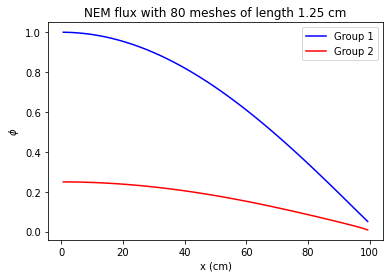

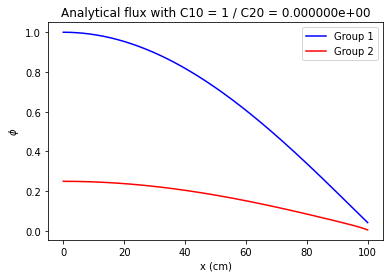

Error between numerical and analytical solution per region:
1: [0.00026745 0.00031535]
2: [0.00149819 0.00153272]
3: [0.00354176 0.00355442]
4: [0.00564005 0.00563033]
5: [0.00694826 0.00755796]


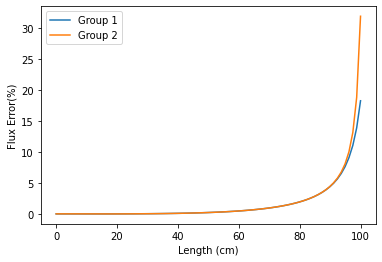


CMFD k-eff for UO2: 1.20395064
Analytical  k-eff for UO2: 1.20394103 (C10 = 1, C20 = -8.899276220536708e-21)
Error (pcm): 0.798237


In [ ]:
# Run the finite difference calculation
CMFD()

# Run the analytical calculation
X_a, phi_a, keff_a, C10, C20 = _analytical(materials[0], 1)

# Plot NEM flux
plot_flux(phi, nmesh, geom[0], 'NEM', log_plot)

# Plot Analytical flux
plot_flux(phi_a, nmesh, geom[0], 'Analytical', log_plot, C20)

# Plot Flux differences
plot_flux_diff(phi, nmesh, nregions, nmesh_per_region, phi_a, log_plot)

# K-eff error
print(f"\nCMFD k-eff for {materials[0]}: {Keff:.08f}")
print(f"Analytical  k-eff for {materials[0]}: {keff_a:.08f} " \
      f"(C10 = {C10}, C20 = {C20})")
print(f"Error (pcm): {1e5*(Keff-keff_a)/keff_a:.06f}")



Iteration Plot

## PART C - Heterogeneous Model

---

